# Task-6: Prediction algorithm using Decision Tree

## Data

Dataset iris.csv has been downloaded from google drive.

URL - https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

## Features

1. Sepal Length.
2. Sepal Width.
3. Petal Length.
4. Petal Width.
5. Species ( Target Variable).

The target variable consists of 3 species :-
1. Iris-setosa.
2. Iris-versicolor
3. Iris-virginica.

## Objective

Our objective is to take the measurements of the Iris species as input data and train a Machine Learning model suing Decision Tree classifier that can learn from the measurements of the Iris species and classify them accordingly.

## Evaluation Metrics

Accuracy will be used as one of the evaluation metrics mainly.

## Preparing toolkits

In [2]:
#importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Loading the dataset from PC
df = pd.read_csv("C:\\Users\\kenka\\OneDrive\\Desktop\\GRIP\\Iris.csv", index_col=0)

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.axes

[Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        ...
        141, 142, 143, 144, 145, 146, 147, 148, 149, 150],
       dtype='int64', name='Id', length=150),
 Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object')]

In [7]:
len(df)

150

In [8]:
df.shape

(150, 5)

## Checking distribution of target

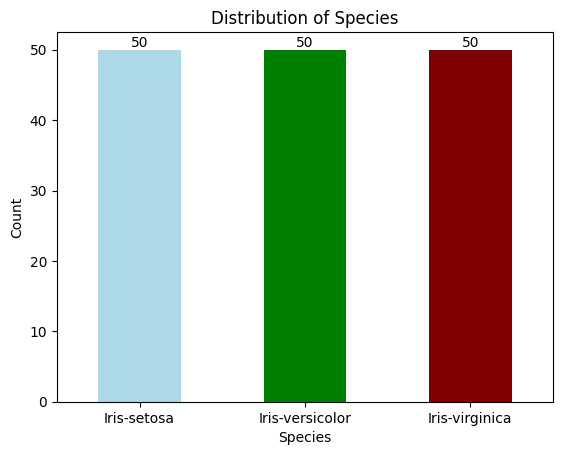

In [9]:
#Distribution of each fuel type
fc = df['Species'].value_counts().sort_index()
x=fc.plot(kind='bar', color=['lightblue', 'green', 'maroon'])
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=0)
x.bar_label(x.containers[0])
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## Checking for Null values and duplicates

In [13]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
df.duplicated().sum()

3

In [15]:
# Removing the id field from Index
df.reset_index(drop=True, inplace=True)

In [16]:
# Removing the duplicate values and keep the first one alone.
df.drop_duplicates(keep="first", inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
df["Species"].value_counts()

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

## Relationship between feature and species (Pairplot and relationship plot)

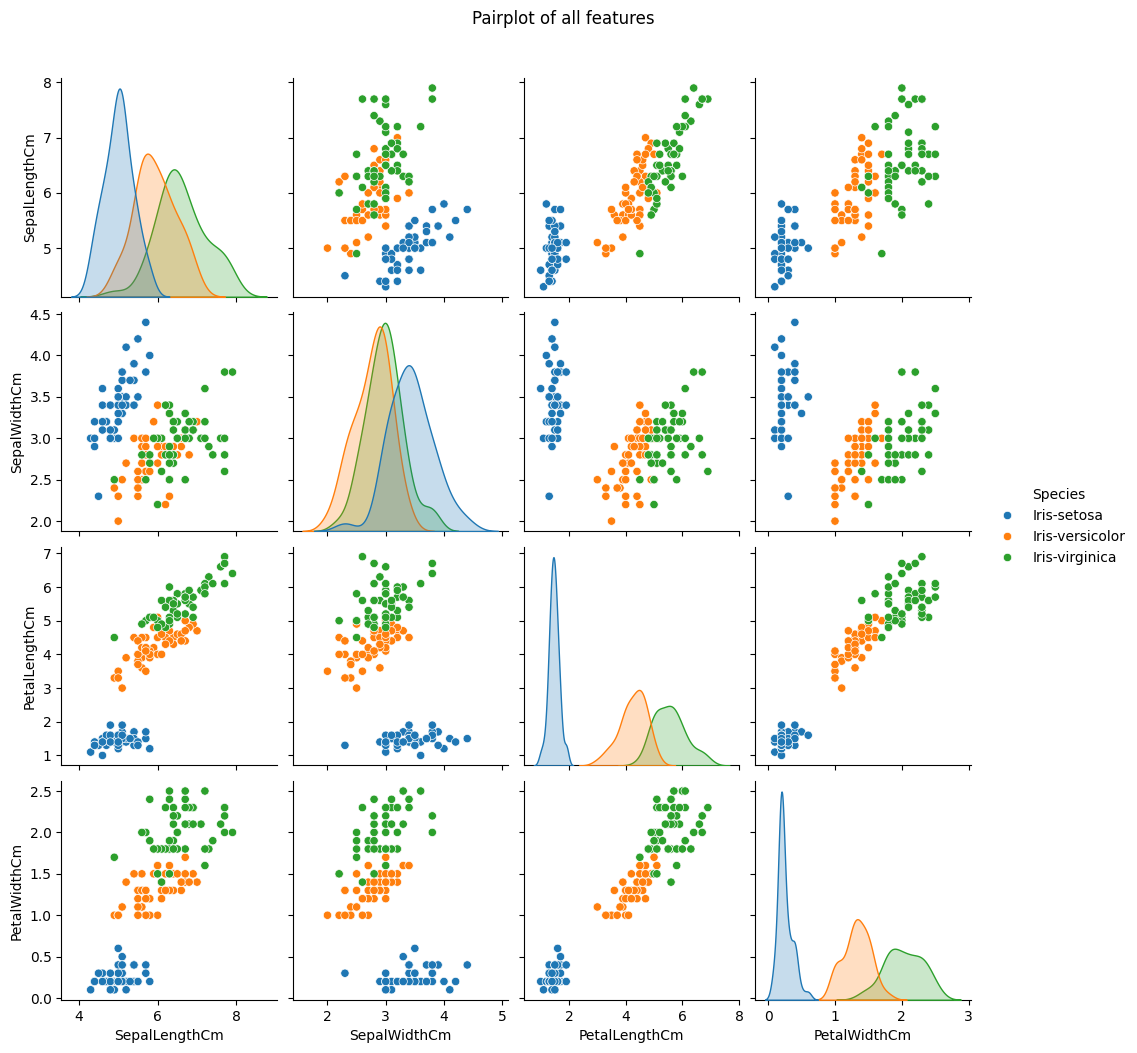

In [20]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(data = df , hue = 'Species')
plt.suptitle("Pairplot of all features", y=1.05)
plt.show()

In [1]:
# Comparing sepal width to the species
plt.figure(figsize=(8,8))
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']
for f in features:
    sns.relplot(x=f, y="Species", hue="Species", data=df)
    plt.suptitle(f, y=1.05)
    plt.show()

NameError: name 'plt' is not defined

## Modelling

In [93]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [94]:
X.head

<bound method NDFrame.head of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                           
1              5.1           3.5            1.4           0.2
2              4.9           3.0            1.4           0.2
3              4.7           3.2            1.3           0.2
4              4.6           3.1            1.5           0.2
5              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
146            6.7           3.0            5.2           2.3
147            6.3           2.5            5.0           1.9
148            6.5           3.0            5.2           2.0
149            6.2           3.4            5.4           2.3
150            5.9           3.0            5.1           1.8

[150 rows x 4 columns]>

In [95]:
y.head

<bound method NDFrame.head of Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 150, dtype: object>

In [96]:
X.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [97]:
y.dtypes

dtype('O')

In [98]:
# CONVERTING THE OBJECT TYPE TO NUMERIC USING MAP FUNCTION. 
ty=y.map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})

In [99]:
ty

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int64

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, ty, test_size=0.20, random_state=42)

In [101]:
X_train.shape

(120, 4)

In [102]:
y_train.shape

(120,)

In [103]:
X_test.shape

(30, 4)

In [104]:
y_test.shape

(30,)

In [105]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [106]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [107]:
#confusion matrix
mt=confusion_matrix(y_test,y_pred)
mt

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

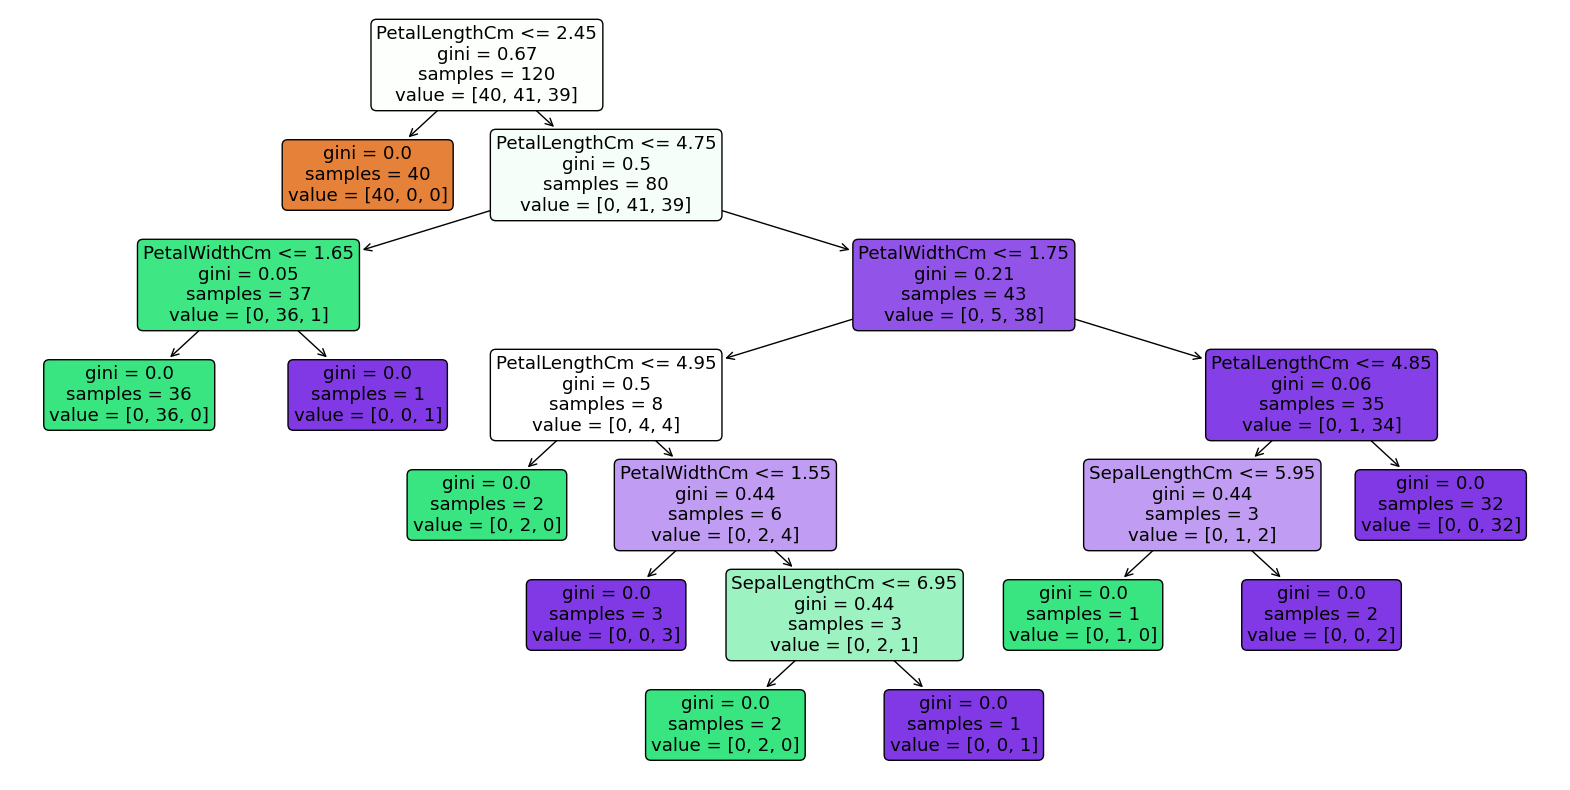

In [137]:
#Visualizing Decision Tree
plt.figure(figsize=(20,10))
_=plot_tree(dtree,feature_names=df.columns,precision=2,rounded=True,filled=True)